# Module 7. Time series analysis Lab 2 

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

### Exercise 1

The file House Sales.csv contains monthly data on the number of new one-family
houses sold in the United States (in thousands) from January 1991 through December 2011.
Housing sales were steadily trending upward until about the beginning of 2006, then the
bottom fell out of the housing market, and sales eventually started trending upward again.   

- First Create a time series chart of the data.
- Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.
- Add predictions for Simple Exponential Smooting to the dataframe.
- Add predictions for Double Exponential Smoothing to the dataframe.
- Calculate the MAE to find the best model

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Houses Sold
Month,
jan/91,401
feb/91,482
mrt/91,507
apr/91,508
mei/91,517


First Create a time series chart of the data.

<Axes: xlabel='Month'>

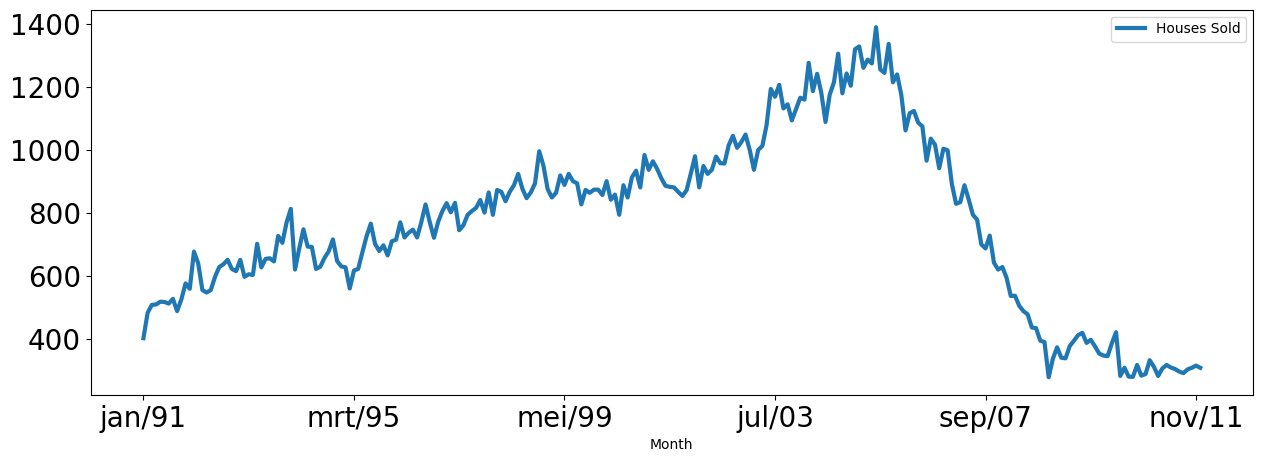

In [3]:
data.plot(y=["Houses Sold"], figsize=(15, 5), linewidth=3, fontsize=20)

Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.

In [4]:
data['SMA3_forecast'] = data['Houses Sold'].rolling(window=3).mean().shift(1)
data['SMA6_forecast'] = data['Houses Sold'].rolling(window=6).mean().shift(1)
data['SMA12_forecast'] = data['Houses Sold'].rolling(window=12).mean().shift(1)
data.head()

,Houses Sold,SMA3_forecast,SMA6_forecast,SMA12_forecast
Month,,,,
jan/91,401,NaN,NaN,NaN
feb/91,482,NaN,NaN,NaN
mrt/91,507,NaN,NaN,NaN
apr/91,508,463.333333,NaN,NaN
mei/91,517,499.000000,NaN,NaN


Add predictions for Simple Exponential Smooting to the dataframe.

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data_ses = SimpleExpSmoothing(data['Houses Sold']).fit(smoothing_level=0.4, optimized=True)
data['SES'] = data_ses.fittedvalues
data.head()

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Houses Sold,SMA3_forecast,SMA6_forecast,SMA12_forecast,SES
Month,,,,,
jan/91,401,NaN,NaN,NaN,460.206846
feb/91,482,NaN,NaN,NaN,436.524108
mrt/91,507,NaN,NaN,NaN,454.714465
apr/91,508,463.333333,NaN,NaN,475.628679
mei/91,517,499.000000,NaN,NaN,488.577207


Add predictions for Double Exponential Smoothing to the dataframe.

In [6]:
from statsmodels.tsa.api import Holt

data_des = Holt(data['Houses Sold']).fit(smoothing_level=.2, smoothing_trend=.2)

data['DES'] = data_des.fittedvalues

data.head()

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Houses Sold,SMA3_forecast,SMA6_forecast,SMA12_forecast,SES,DES
Month,,,,,,
jan/91,401,NaN,NaN,NaN,460.206846,464.327402
feb/91,482,NaN,NaN,NaN,436.524108,460.066021
mrt/91,507,NaN,NaN,NaN,454.714465,473.734275
apr/91,508,463.333333,NaN,NaN,475.628679,490.999508
mei/91,517,499.000000,NaN,NaN,488.577207,505.691713


Calculate the MAE to find the best model. First drop the rows with NaN.

<Axes: xlabel='Month'>

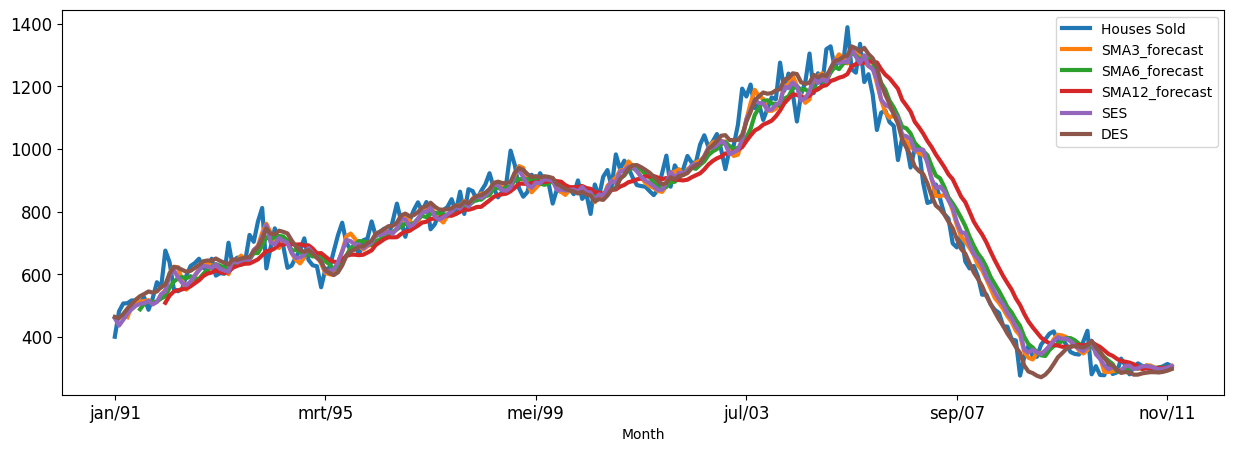

In [7]:
data.plot(y=["Houses Sold", "SMA3_forecast", "SMA6_forecast", "SMA12_forecast", "SES", "DES"], figsize=(15, 5), linewidth=3, fontsize=12)

In [8]:
columns = ['SMA3', 'SMA6', 'SMA12', 'SES', 'DES']

## Exercise 2

You have been assigned to forecast the number of aircraft engines ordered each month from an engine manufacturing company. At the end of February, the
forecast is that 100 engines will be ordered during April.
Then during March, 120 engines are actually ordered.  
Using $\alpha$ = 0.3, determine a forecast (at the end of March) for the number of orders placed during April and during May. Use simple exponential
smoothing.  
These are the appropriate formulae

$X_t = \alpha x_t + (1 - \alpha) X_{t-1}$

$F_{t+m} = X_t$

In [9]:
'''
t -> end of march

t-1 -> end of feb

t+1 -> end of april

alpha = 0.3
x_t = 120
X_t_minnus_1 = 100 -> 2nd formula F_april = 100 = X_t_minnus_1 (m = 1 => the forecast at the end of feb is X_March)
'''

alpha = 0.3
forecast_feb = 100
actual_mar = 120

# Calculate forecast at the end of March
forecast_mar = alpha * actual_mar + (1 - alpha) * forecast_feb

# Forecast for April and May
forecast_apr = forecast_mar
forecast_may = forecast_mar

print("Forecast for April:", forecast_apr, "engines")
print("Forecast for May:", forecast_may, "engines")


Forecast for April: 106.0 engines
Forecast for May: 106.0 engines


## Exercise 3

An automobile dealer is using Holt's method to
forecast weekly car sales. Currently, the level is
estimated to be 50 cars per week, and the trend is
estimated to be six cars per week. During the current
week, 30 cars are sold. After observing the current
week's sales, forecast the number of cars three weeks
from now. Use $α = $β = 0.3.

These are the appropriate formulae

$X_{t} = \alpha x_{t} + (1-\alpha)(X_{t-1} + b_{t-1})$

$b_{t} = \beta(X_{t}-X_{t-1}) + (1-\beta)b_{t-1}$

$F_{t+m} = X_t + mb_t$

In [10]:
alpha = 0.3
beta = 0.3
X_t = 50 # initial level X_t_minnus_1
b_t = 6 # initial trend b_t_minnus_1
x_t = 30 # actual value for current week

# calculate new level and trend
X_t_new = alpha * x_t + (1 - alpha) * (X_t + b_t)
b_t_new = beta * (X_t_new - X_t) + (1 - beta) * b_t

# calculate forecast for three weeks from now
m = 3
X_f = X_t_new + m * b_t_new

print("Forecast for three weeks from now:", X_f)

Forecast for three weeks from now: 59.17999999999999


### Exercise 4

Consider the airline ticket data in the file airline ticket data.csv  
- Create a time series chart of the data. Based on what
you see, which of the exponential smoothing models
do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


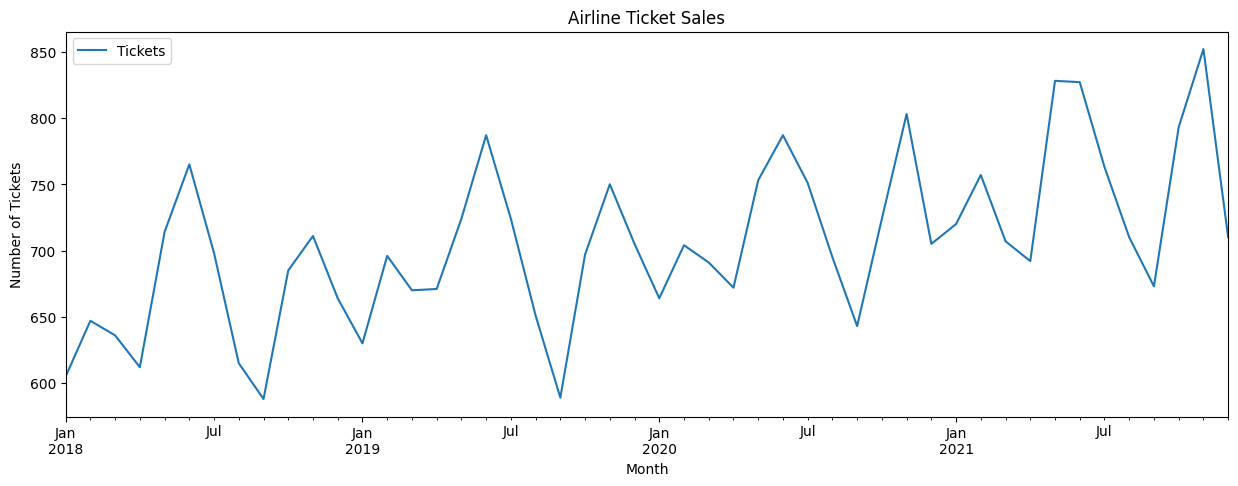

In [16]:
data.plot(y=['Tickets'], figsize=(15, 5))
# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.title('Airline Ticket Sales')

# Show the plot
plt.show()

## We need the Holt-Winters model because we have a trend and a seasonality

<Axes: xlabel='Month'>

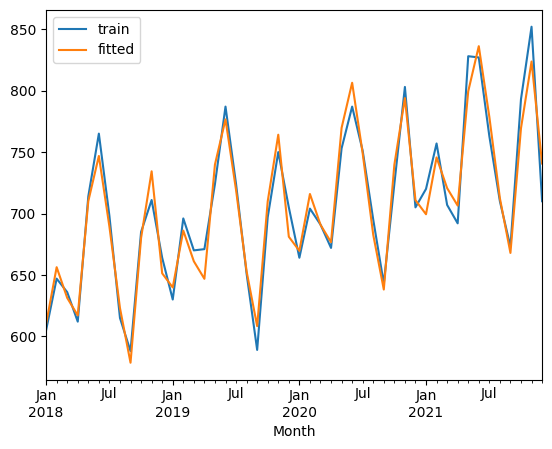

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data.Tickets

model = ExponentialSmoothing(train,
  trend='add', seasonal='add',
  seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')

<Axes: xlabel='Month'>

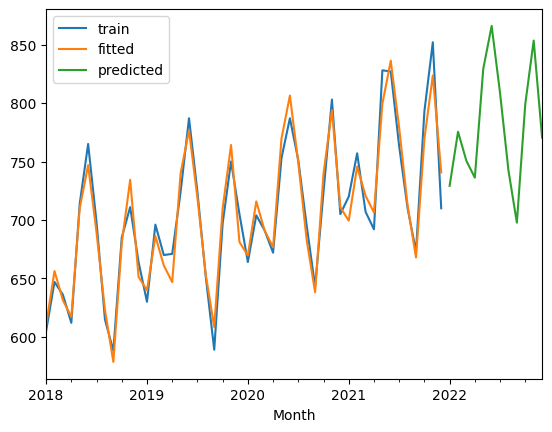

In [18]:
predicted = model.forecast(12)

train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')
predicted.plot(legend=True, label='predicted')

### Exercise 5

The file US Retail.csv contains monthly retail sales of
beer, wine, and liquor at U.S. liquor stores.
- Is seasonality present in these data?
- Create a time series chart of the data. Based on what
you see, which of the exponential smoothing models
do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


<Axes: xlabel='Month'>

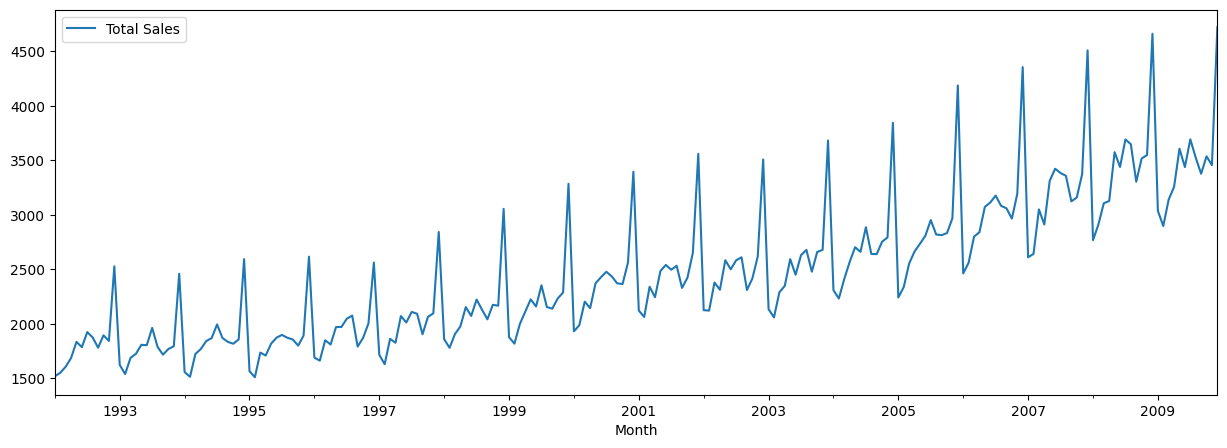

In [20]:
data.plot(y=['Total Sales'], figsize=(15, 5))

## Multiplicative seasonal trend because the amplitude of the seasonality increases over time

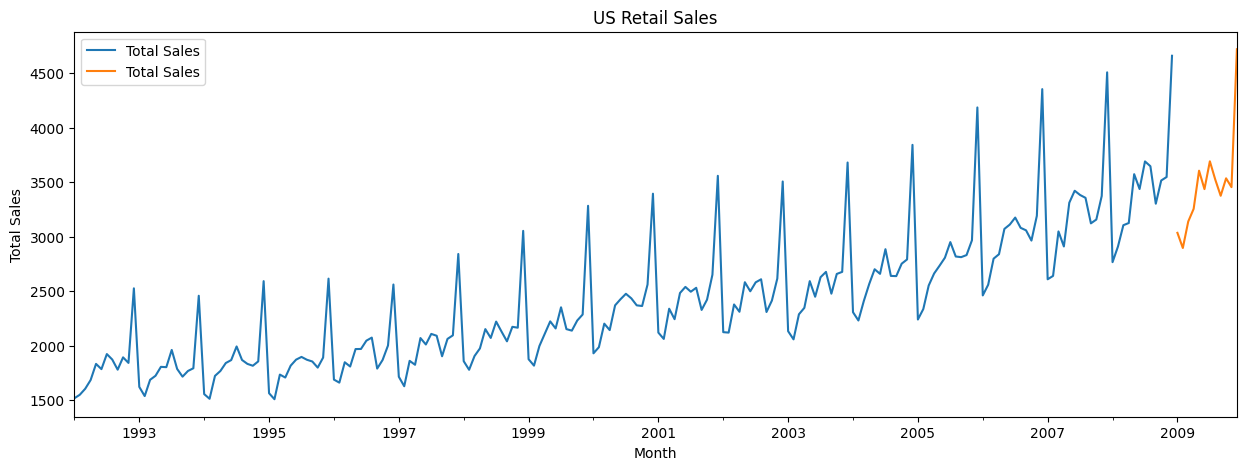

In [30]:
# Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)
train = data['Total Sales']['1992-01-01':'2008-12-01']
test = data['Total Sales']['2009-01-01':'2009-12-01']

# Plot the train and test sets
train.plot(y=['Total Sales'], figsize=(15, 5), legend=True)
test.plot(y=['Total Sales'], figsize=(15, 5), legend=True)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('US Retail Sales')

# Show the plot
plt.show()

<Axes: xlabel='Month'>

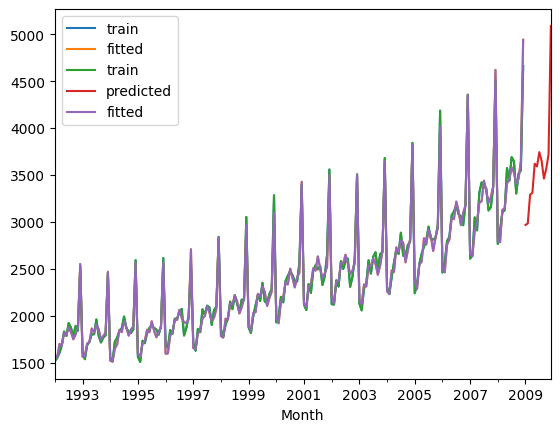

In [31]:

# Create and train the model. 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train,
    trend='add', seasonal='mul',
    seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')

train.plot(legend=True, label='train')
predicted.plot(legend=True, label='predicted')

model.fittedvalues.plot(legend=True, label='fitted')

In [33]:
# Predict the values for 2009.
predicted = model.forecast(12)

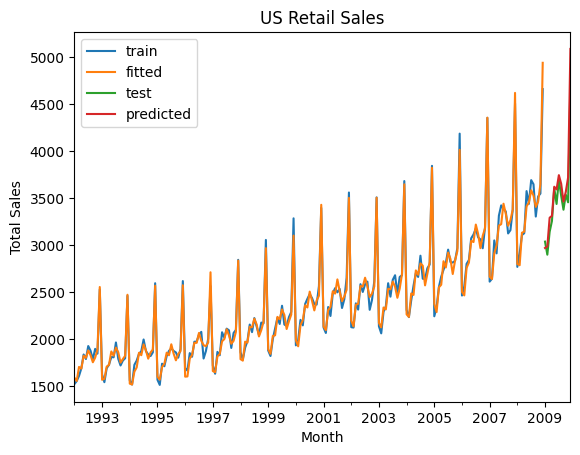

In [34]:

# Create a plot with the train data, the fitted values, the test data and the predicted values.
# Plot the train and test sets
train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
predicted.plot(legend=True, label='predicted')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('US Retail Sales')

# Show the plot
plt.show()


In [35]:
# Calculate MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, predicted)
print('MAE: %.3f' % mae)


MAE: 121.389


## Source
Business Analytics Data Analysis & Decision Making 